# Algoritma Page Rank
PageRank ( PR ) adalah algoritma yang digunakan oleh Google Search untuk menentukan peringkat halaman web dalam hasil mesin pencari mereka. Namanya diambil dari istilah "halaman web" dan salah satu pendiri Larry Page . PageRank adalah cara mengukur pentingnya halaman situs web. Menurut Google,
PageRank bekerja dengan menghitung jumlah dan kualitas tautan ke suatu halaman untuk menentukan perkiraan kasar tentang seberapa penting situs web tersebut. Asumsi yang mendasarinya adalah bahwa situs web yang lebih penting cenderung menerima lebih banyak tautan dari situs web lain.

Contoh graf berikut:

![Screenshot 2024-06-04 194741.png](<attachment:Screenshot 2024-06-04 194741.png>)
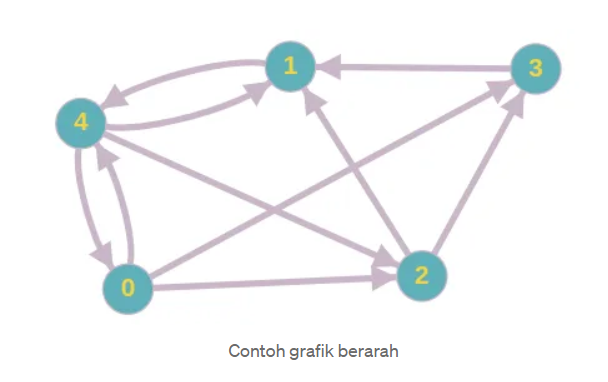

Apabila node-node diatas melambangkan halaman web, kita dapat menentukan skor dari sebuah node sebagai berikut:

$r_j = \sum_{i \rightarrow j} \frac {r_i}{j_i}$

dimana $r_i$ adalah skor dari node $i$ dan $d_i$ derajat keluarnya

Dari operasi diatas, bisa kita dapat tulis dengan sistem linier sebagai berikut

$\begin{align}
& \left\{
\begin{aligned}
r_0 & = \frac{r_4}{3}\\
r_1 & = \frac{r_2}{2} + \frac{r_4}{3} + r_3 \\
r_2 & = \frac{r_0}{3} + \frac{r_4}{3} \\
r_3 & = \frac{r_2}{2} + \frac{r_0}{3} \\
r_4 & = \frac{r_0}{3} + r_1 
\end{aligned}
\right.
\end{align}
$

Dari sistem linier diatas bisa kita ubah menjadi matriks transisi sebagai berikut

$ P = \begin{pmatrix} 
0 & 0 & 0 & 0 & \frac{1}{3} \\
0 & 0 & \frac{1}{2} & 1 & \frac{1}{3} \\
\frac{1}{3} & 0 & 0 & 0 & \frac{1}{3} \\
\frac{1}{3} & 0 & \frac{1}{2} & 0 & 0 \\
\frac{1}{3} & 1 & 0 & 0 & 0 \\
\end{pmatrix}$

Setelah itu, kita dapat hitung Page Rank dengan menggunakan NumPy pada python sebagai berikut:

In [30]:
import numpy as np

A = np.array([[0, 0, 0, 0, 1/3],
              [0, 0, 1/2, 1, 1/3],
              [1/3, 0, 0, 0, 1/3],
              [1/3, 0, 1/2, 0, 0],
              [1/3, 1, 0, 0, 0]])

V = np.array([1/5, 1/5, 1/5, 1/5, 1/5])

def kalimatrik(A, V, conv=0.01, iter_count=0):
    AV = A.dot(V)
    iter_count += 1
    if np.linalg.norm(AV - V) < conv:
        return AV, iter_count
    else:
        return kalimatrik(A, AV, conv, iter_count)

def urutkan_dengan_indeks(V):
    # Menggabungkan nilai-nilai dengan indeks aslinya
    indexed_V = [(i, v) for i, v in enumerate(V)]
    # Mengurutkan berdasarkan nilai
    sorted_indexed_V = sorted(indexed_V, key=lambda x: x[1], reverse=True)
    return sorted_indexed_V

result, total_iterations = kalimatrik(A, V)
sorted_result = urutkan_dengan_indeks(result)

print("Hasil setelah konvergensi:")
print(result)
print("\nBanyak iterasi yang dilakukan:")
print(total_iterations)
print("\nHasil yang diurutkan dengan indeks asli:")
for index, value in sorted_result:
    print(f"Indeks: {index}, Nilai: {value}")


Hasil setelah konvergensi:
[0.11150739 0.293549   0.14974089 0.11342783 0.33177488]

Banyak iterasi yang dilakukan:
8

Hasil yang diurutkan dengan indeks asli:
Indeks: 4, Nilai: 0.3317748818777625
Indeks: 1, Nilai: 0.29354900167657366
Indeks: 2, Nilai: 0.149740893156531
Indeks: 3, Nilai: 0.11342783112330437
Indeks: 0, Nilai: 0.11150739216582836
